In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymc3 import  *
from src import load_clean_data as load
%matplotlib inline

In [21]:
df = load.load_all_data(2015)
df.head()

/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: DtypeWarning: Columns (13,14,19,20,193,194,265,266) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,perc_male,perc_white,perc_black,perc_hisp,perc_20_44,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,48.6,79.2,19.1,2.5,32.4,19410,333,514,1.715611,2.648120
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,48.8,88.2,10.0,4.5,29.4,69724,925,1429,1.326659,2.049509
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,53.7,48.7,47.3,4.7,33.6,11567,82,127,0.708913,1.097951
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,53.9,77.9,22.0,2.0,33.7,9508,119,184,1.251578,1.935212
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,49.6,96.8,2.1,8.5,30.2,21368,601,928,2.812617,4.342943


In [47]:
df_no_zero_outlier = df[((df.HIVincidence > 0) & (df.HIVincidence < 130))]
df_no_zero_outlier['log_household_income'] = np.log10(df_no_zero_outlier.household_income)
df_no_zero_outlier.head()

/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,perc_white,perc_black,perc_hisp,perc_20_44,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,log_household_income
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,79.2,19.1,2.5,32.4,19410,333,514,1.715611,2.648120,4.307582
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,88.2,10.0,4.5,29.4,69724,925,1429,1.326659,2.049509,4.863668
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,96.8,2.1,8.5,30.2,21368,601,928,2.812617,4.342943,4.320852
5,1011,Bullock County,AL,2015,0.0,8.0,90.7,691.4,0.0,0.0,...,27.1,72.0,4.0,35.2,4597,73,113,1.587992,2.458125,3.573568
7,1015,Calhoun County,AL,2015,0.0,10.0,10.3,211.2,5.0,0.0,...,76.9,21.6,3.4,32.4,43018,692,1070,1.608629,2.487331,4.656558


In [48]:
df_no_zero_outlier.columns

Index(['county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR', 'AMAT_fac',
       'HIVdiagnoses', 'HIVincidence', 'HIVprevalence', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'unemployment_rate', 'poverty_rate',
       'household_income', 'perc_male', 'perc_white', 'perc_black',
       'perc_hisp', 'perc_20_44', 'ADULTMEN', 'MSM12MTH', 'MSM5YEAR',
       '%msm12month', '%msm5yr', 'log_household_income'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler

X = df_no_zero_outlier[['HIVprevalence', 
                             'perc_black', 
                             'perc_white', 
                             'pctunins', 
                             'poverty_rate', 
                             'pctunmetneed', 
                             'drugdep', 
                             'nonmedpain']].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df_no_zero_outlier.HIVincidence.values # target value

In [25]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC



model1_bic = LassoLarsIC(criterion='bic')
model1_bic.fit(X, y)
alpha_bic_ = model1_bic.alpha_
model1_bic_coef = model1_bic.coef_
bic = model1_bic.criterion_.min()

model1_aic = LassoLarsIC(criterion='aic')
model1_aic.fit(X, y)
alpha_aic_ = model1_aic.alpha_
model1_aic_coef = model1_aic.coef_
aic = model1_aic.criterion_.min()

alpha_bic_, alpha_aic_, bic, aic, model1_bic_coef, model1_aic_coef

(0.018169355582888135,
 0.0030423650460350165,
 275.76192274701316,
 260.73492305480016,
 array([ 5.6295549 ,  4.62334827,  0.        ,  2.43552315,  0.        ,
         0.        ,  0.        ,  0.        ]),
 array([ 6.12476817,  4.81428788,  0.        ,  2.54304541,  0.        ,
         0.        , -0.7244089 ,  0.68520542]))

/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


Text(0.5,1,'Information-criterion for model selection')

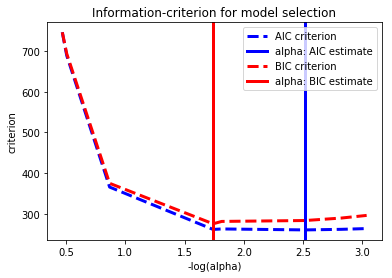

In [14]:
def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model1_aic, 'AIC', 'b')
plot_ic_criterion(model1_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection')

In [138]:
def score_model(data, model_list, features, target_col):
    # define and scale the feature matrix
    X = data[features].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    # define the target vector
    y = df_no_zero_outlier.HIVincidence.values
    
    # iterate the list of models to populate the score vector
    score = [features]
    for model in model_list:
        model.fit(X, y)
        score.append(round(model.criterion_.min(), 2))
    
    return score


def model_selection(data, features_list, target_col):
    # Instanciate the models for bic and aic scoring
    model_bic = LassoLarsIC(criterion='bic')
    model_aic = LassoLarsIC(criterion='aic')
    model_lst = [model_bic, model_aic]
    
    # iterate the features list to populate the scores list
    score_lst = []
    for features in features_list:
        score = score_model(data, model_lst, features, target_col)
        score_lst.append(score)
        
    # turn scores list into a pandas df
    score_df = pd.DataFrame(score_lst, columns=['Features', "BIC", 'AIC'])
    score_df['Features'] = score_df['Features'].apply(lambda x: ' + '.join(x))
    score_df['num_features'] = [len(x) for x in score_df.Features]
    
    return score_df
       

In [143]:
features_list = [['HIVprevalence'], ['HIVprevalence', 'perc_black'], ['HIVprevalence', 'perc_white'], 
                  ['HIVprevalence', 'perc_black', 'perc_white'],
                  ['HIVprevalence', 'perc_black', 'pctunins'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'poverty_rate'],
                  ['HIVprevalence', 'perc_black', 'pctunins', 'poverty_rate', 'pctunmetneed'],
                  ['HIVprevalence', 'perc_black', 'pctunins', 'pctunmetneed'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'drugdep'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'nonmedpain'], 
                  ['HIVprevalence','perc_black','pctunins','poverty_rate','drugdep','nonmedpain'],
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income'],
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm12month'],
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr', 'perc_20_44'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr', 'perc_20_44', 'Med_MH_fac'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr', 'perc_20_44', 'Med_MH_fac', 'Med_SMAT_fac'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr', 'perc_20_44', 'Med_MH_fac', 'Med_SMAT_fac', 'mme_percap'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr', 'perc_20_44', 'Med_MH_fac', 'Med_SMAT_fac', 'mme_percap', 'partD30dayrxrate'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr', 'perc_20_44', 'Med_MH_fac', 'Med_SMAT_fac', 'mme_percap', 'partD30dayrxrate', 'bup_phys'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', 'perc_20_44', 'mme_percap']]

df = model_selection(df_no_zero_outlier, features_list, target_col='HIVincidence')

df

,Features,BIC,AIC,num_features
0,HIVprevalence,378.82,374.20,13
1,HIVprevalence + perc_black,299.28,290.05,26
2,HIVprevalence + perc_white,327.24,318.01,26
3,HIVprevalence + perc_black + perc_white,305.77,291.92,39
4,HIVprevalence + perc_black + pctunins,273.82,259.97,37
5,HIVprevalence + perc_black + pctunins + poverty_rate,273.85,260.01,52
6,HIVprevalence + perc_black + pctunins + poverty_rate + pctunmetneed,274.53,260.69,67
7,HIVprevalence + perc_black + pctunins + pctunmetneed,274.53,260.69,52
8,HIVprevalence + perc_black + pctunins + drugdep,275.06,260.88,47
9,HIVprevalence + perc_black + pctunins + nonmedpain,275.76,261.12,50


In [144]:
lowest = df[df.BIC == df.BIC.min()]
lowest)

,Features,BIC,AIC,num_features
11,HIVprevalence + perc_black + pctunins + log_household_income,269.71,251.25,60


In [ ]:
X = df_no_zero_outlier[['HIVprevalence']].values


scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df_no_zero_outlier.HIVincidence.values # target value

data = dict(X=X, y=y)

with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.GLM.from_formula('y ~ X', data)
    trace = sample(3000, njobs=2) # draw 3000 posterior samples using NUTS sampling